# Práctica 2
## Parte 1. Análisis de sentimientos 
<br>

__Alumnos:__
* __Frederick Ernesto Borges Noronha__
* __Victor Manuel Cavero Gracia__

### Apartado A.

Configura una partición train-test usando el 75% de los datos para entrenamiento y el 25% restante para test.

Vamos a estudiar varias representaciones de bolsa de palabras, pero todas ellas utilizarán __countVectorizer__ con el diccionario que se crea a partir de los términos del propio corpus y la lista de palabras vacías (__stop_words__) que proporciona sklearn para el inglés. Las 4 posibilidades que estudiaremos surgen de combinar los siguientes 2 parámetros:

* Bolsa de palabras binaria y bolsa de palabras con TF/IDF (parámetro binary).
* Usando un rango de n-gramas de (1,1) y de (1,2) (parámetro __ngram_range__).

Para cada una de esas 4 combinaciones entrenaremos dos clasificadores:

1. Un clasificador naive bayes, eligiendo el más adecuado para cada caso.
2. Un árbol de decisión buscando un valor óptimo para uno de los siguientes parámetros para que se maximice la tasa de aciertos en el conjunto de test: __max_depth__, __min_samples_leaf__ o __max_leaf_nodes__ (siempre el mismo).

Analiza la tasa de aciertos de entrenamiento y test de los 2 clasificadores en las 4 representaciones de bolsa de palabras (8 configuraciones en total) y contesta a las siguientes preguntas:

* ¿Hay un clasificador que sea superior al otro? ¿por qué crees que sucede?
* Para cada clasificador, ¿tiene un efecto positivo el añadir “complejidad” a la vectorización? Es decir, añadir bigramas y añadir tf-idf. ¿Por qué crees que sucede este efecto positivo o la falta del mismo?

Selecciona el mejor árbol de decisión y obtén las 25 variables con más poder discriminante:

* ¿Predominan más las palabras de uno u otro sentimiento? ¿por qué? ¿hay ruido?

Selecciona el mejor clasificador naive bayes y obtén las 25 variables con más presencia en cada clase:

* ¿Tienen sentido las palabras seleccionadas? ¿hay ruido (palabras sin sentimiento o de sentimiento opuesto al esperado)? ¿por qué crees que suceden estos fenómenos?

Finalmente, explica de manera razonada las conclusiones que has extraído de todo el estudio realizado en este apartado.

### Apartado B.

Toma el mejor clasificador Naive Bayes y el mejor árbol de decisión y analiza a fondo sus resultados en el conjunto de test.
1. Analiza la precisión y la exhaustividad de cada clasificador en cada una de las clases (opiniones positivas y negativas).
    * Para cada clasificador, ¿tiene un comportamiento homogéneo a la hora de clasificar ambas clases?
    * ¿Cuáles son las fortalezas y debilidades de cada uno de los clasificadores?
    * ¿Hay algún clasificador que sea mejor que el otro en todo?
    * ¿Coinciden ambos clasificadores a la hora de clasificar mejor una clase que la otra?

2. Pinta los 8 primeros niveles del árbol de decisión y comenta lo que ves.
    * ¿Qué estructura tiene el árbol?
    * ¿Cómo interpretas los niveles que has pintado? ¿tienen algún sentido con respecto a la tasa de aciertos, o la precisión y exhaustividad del clasificador? o ¿Hay nodos impuros?
    
3. Por cada clasificador identifica 2 críticas que hayan sido falsas positivas (malas críticas calificadas como buenas) y 2 críticas que han sido falsas negativas (buenas críticas clasificadas como malas). Analiza tanto su texto original, como el vector de palabras resultante (solamente los términos activos).
    * ¿Por qué crees que ha fallado el clasificador en cada uno de los casos?
    * ¿Se te ocurre alguna idea sobre cómo mejorar el clasificador de sentimiento?

### Imports:
A continuación se encuentran todos los imports de las librerias de las que haremos uso en esta práctica.

In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

# Apartado A.

In [170]:
# Read the dataset
data = pd.read_csv('Datos/yelp_labelled.txt', sep="\t", header=None)

data.columns = ['data','type']
dic_target = {0 : 'bad', 1 : 'good'}
data['type'] = data['type'].map(dic_target)

train, test = tts(data, train_size=0.75, test_size=0.25, random_state=42)

In [171]:
# Show the data
data

,data,type
0,Wow... Loved this place.,good
1,Crust is not good.,bad
2,Not tasty and the texture was just nasty.,bad
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,good
4,The selection on the menu was great and so were the prices.,good
...,...,...
995,I think food should have flavor and texture and both were lacking.,bad
996,Appetite instantly gone.,bad
997,Overall I was not impressed and would not go back.,bad
998,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",bad


In [172]:
# Show the train data
train

,data,type
82,The turkey and roast beef were bland.,bad
991,Spend your money and time some place else.,bad
789,"Great atmosphere, friendly and fast service.",good
894,If you stay in Vegas you must get breakfast here at least once.,good
398,Service is perfect and the family atmosphere is nice to see.,good
...,...,...
106,"The food was delicious, our bartender was attentive and personable AND we got a great deal!",good
270,The Veggitarian platter is out of this world!,good
860,"This place is pretty good, nice little vibe in the restaurant.",good
435,It was a huge awkward 1.5lb piece of cow that was 3/4ths gristle and fat.,bad


In [173]:
# Show the test data
test

,data,type
521,If you haven't gone here GO NOW!,good
737,"Try them in the airport to experience some tasty food and speedy, friendly service.",good
740,The restaurant is very clean and has a family restaurant feel to it.,good
660,"I personally love the hummus, pita, baklava, falafels and Baba Ganoush (it's amazing what they d...",good
411,"Come hungry, leave happy and stuffed!",good
...,...,...
109,Sooooo good!!,good
430,I never come again.,bad
77,The sweet potato fries were very good and seasoned well.,good
84,The pan cakes everyone are raving about taste like a sugary disaster tailored to the palate of a...,bad


Como podemos observar teniamos __1000 filas__ en los `datos iniciales` y al generar las particiones de train y test se obtienen un conjunto de `train` de __750 filas__ (75%) y otro de`test` de __250 filas__ (25%).

In [174]:
vectorizer = CountVectorizer(stop_words='english')
# Tomamos los textos del conjunto de entrenamiento y los transformamos en 
# una matriz de datos (palabras) según el diccionario estándar
train_vector_data=vectorizer.fit_transform(train['data'])

In [175]:
feature_names = vectorizer.get_feature_names()

print(feature_names)
print("Feature_names Length", len(feature_names))

['10', '100', '12', '17', '1979', '20', '2007', '30', '30s', '35', '40', '40min', '45', '4ths', '5lb', '70', '85', '90', 'absolute', 'absolutely', 'absolutley', 'accident', 'accomodate', 'accordingly', 'accountant', 'acknowledged', 'actual', 'actually', 'added', 'affordable', 'afternoon', 'ago', 'ahead', 'airline', 'ala', 'allergy', 'amazing', 'ambiance', 'ambience', 'ample', 'andddd', 'angry', 'anymore', 'anytime', 'anyways', 'apart', 'apologize', 'apology', 'app', 'appalling', 'apparently', 'appealing', 'appetite', 'appetizer', 'appetizers', 'apple', 'area', 'aren', 'arepas', 'aria', 'array', 'arrived', 'arrives', 'arriving', 'ask', 'asked', 'asking', 'assure', 'ate', 'atmosphere', 'attached', 'attack', 'attention', 'attentive', 'attitudes', 'auju', 'authentic', 'average', 'avocado', 'avoid', 'avoided', 'away', 'awesome', 'awful', 'awkward', 'awkwardly', 'baby', 'bacon', 'bad', 'bagels', 'bakery', 'bamboo', 'bar', 'bare', 'barely', 'bargain', 'bartender', 'bartenders', 'baseball', 'b

La lista de palabras que se utilizará para realizar el analisis de sentimientos contienen `1523 palabras`.

### Clasificador Naive Bayes

Para poder realizar un análisis de los resultados posteriores debemos calcular un Naive Bayes sin ninguno de los parametros que estamos ajustando (`binary` y `ngram_range`).

Estos parametros tienen los siguientes valores por defecto:
* `binary`. Por defecto: __False__.

* `ngram_range`. Por defecto: __(1, 1)__.

In [176]:
vectorizer0 = CountVectorizer(stop_words='english')

train_vector_data0 = vectorizer0.fit_transform(train['data'])
test_vector_data0 = vectorizer.transform(test['data'])

In [177]:
mnb_classifier0 = MultinomialNB()

mnb_classifier0.fit(train_vector_data0, train['type'])

mnb_train_predictions0 = mnb_classifier0.predict(train_vector_data0)
mnb_test_predictions0 = mnb_classifier0.predict(test_vector_data0)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions0 == train['type']))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions0 == test['type']))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.952
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.764


- __Bolsa de palabras binaria con Monogramas:__ (Código NB1)

In [178]:
vectorizer1 = CountVectorizer(stop_words='english', binary=True, ngram_range=(1,1))

train_vector_data1 = vectorizer1.fit_transform(train['data'])
test_vector_data1 = vectorizer1.transform(test['data'])

In [179]:
mnb_classifier1 = MultinomialNB()

mnb_classifier1.fit(train_vector_data1, train['type'])

mnb_train_predictions1 = mnb_classifier1.predict(train_vector_data1)
mnb_test_predictions1 = mnb_classifier1.predict(test_vector_data1)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions1 == train['type']))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions1 == test['type']))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9506666666666667
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.764


In [180]:
labels = ['NB1']
train_means = [np.mean(mnb_train_predictions1 == train['type']) * 100]
test_means = [np.mean(mnb_test_predictions1 == test['type']) * 100]

__¿Tiene un efecto positivo el añadir “complejidad” a la vectorización? ¿Por qué crees que sucede este
efecto positivo o la falta del mismo?__

|<center>PARTICIÓN</center>|<center>REF</center>|<center>NB1</center>|
|---------|---|---|
|<center>**Train**</center>|<center>0.952</center>|<center>0.9506666666666667</center>|
|<center>**Test**</center>|<center>0.764</center>|<center>0.764</center>|

Como podemos observar, añadir los parametros para que funcione con bolsa de palabras binaria (`binary=True`) y con monogramas (`ngram_range=(1,1)`, esto no añade complejidad ya que es igual que el parametro por defecto), no producen una mejora en el resultado numérico, por lo contrario empeora la tasa de aciertos en test, pero no indica que sea un mal resultado, ya que quizas con esta implemetación se estan aprendiendo reglas que no correctas.

- __Bolsa de palabras binaria con Monogramas y Bigramas:__ (Código NB2)

In [181]:
vectorizer2 = CountVectorizer(stop_words='english', binary=True, ngram_range=(1,2))

train_vector_data2 = vectorizer2.fit_transform(train['data'])
test_vector_data2 = vectorizer2.transform(test['data'])

In [182]:
mnb_classifier2 = MultinomialNB()

mnb_classifier2.fit(train_vector_data2, train['type'])

mnb_train_predictions2 = mnb_classifier2.predict(train_vector_data2)
mnb_test_predictions2 = mnb_classifier2.predict(test_vector_data2)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions2 == train['type']))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions2 == test['type']))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9773333333333334
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.772


In [183]:
labels = labels + ['NB2']
train_means = train_means + [np.mean(mnb_train_predictions2 == train['type']) * 100]
test_means = test_means + [np.mean(mnb_test_predictions2 == test['type']) * 100]

__¿Tiene un efecto positivo el añadir “complejidad” a la vectorización? ¿Por qué crees que sucede este
efecto positivo o la falta del mismo?__

|<center>PARTICIÓN</center>|<center>REF</center>|<center>NB2</center>|
|---------|---|---|
|<center>**Train**</center>|<center>0.952</center>|<center>0.9773333333333334</center>|
|<center>**Test**</center>|<center>0.764</center>|<center>0.772</center>|

Como podemos observar, añadir los parametros para que funcione con bolsa de palabras binaria (`binary=True`) y con monogramas y bigramas (`ngram_range=(1,2)`), ofrece una diferencia en el porcentaje de aciertos tanto en el conjunto de train como en el conjunto de test.

Esto viene dado porque se usa la hipotesis de Markov para calcular la frecuenta de los bigramas y esto hace que los calculos realizados sean mas precisos que solo evaluar una palabra en un contexto determinado.

- __Bolsa de palabras con TF/IDF con Monogramas:__ (Código NB3)

In [184]:
vectorizer3 = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,1))

train_vector_data3=vectorizer3.fit_transform(train['data'])

tfidfer3= TfidfTransformer()

# Calculamos el valor TF-IDF 
train_preprocessed3=tfidfer3.fit_transform(train_vector_data3)

# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
test_vector_data3=vectorizer3.transform(test['data'])
# Calculamos el valor TF-IDF 
# Al usar "transform" toma como IDF el del conjunto de entrenamiento 
test_preprocessed3=tfidfer3.transform(test_vector_data3)

In [185]:
mnb_classifier3 = MultinomialNB()

mnb_classifier3.fit(train_preprocessed3, train['type'])

mnb_train_predictions3 = mnb_classifier3.predict(train_preprocessed3)
mnb_test_predictions3 = mnb_classifier3.predict(test_preprocessed3)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions3 == train['type']))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions3 == test['type']))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9613333333333334
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.772


In [186]:
labels = labels + ['NB3']
train_means = train_means + [np.mean(mnb_train_predictions3 == train['type']) * 100]
test_means = test_means + [np.mean(mnb_test_predictions3 == test['type']) * 100]

__¿Tiene un efecto positivo el añadir “complejidad” a la vectorización? ¿Por qué crees que sucede este
efecto positivo o la falta del mismo?__

|<center>PARTICIÓN</center>|<center>REF</center>|<center>NB3</center>|
|---------|---|---|
|<center>**Train**</center>|<center>0.952</center>|<center>0.9613333333333334</center>|
|<center>**Test**</center>|<center>0.764</center>|<center>0.772</center>|

Como podemos observar, añadir los parametros para que funcione con bolsa de palabras con TF/IDF (`binary=False`) y con monogramas (`ngram_range=(1,1)`), ofrece una diferencia en el porcentaje de aciertos tanto en el conjunto de train como en el conjunto de test.

Esto se debe al que al calcular con TF/IDF la bolsa de palabras la importancia de una palabra sea inversamente relativa a lo común que es en el documento, por tanto se obtiene una mejora en el clasificador.

- __Bolsa de palabras con TF/IDF con Monogramas y Bigramas:__ (Código NB4)

In [187]:
vectorizer4 = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,2))

train_vector_data4 = vectorizer4.fit_transform(train['data'])

tfidfer4 = TfidfTransformer()

# Calculamos el valor TF-IDF 
train_preprocessed4 = tfidfer4.fit_transform(train_vector_data4)

# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
test_vector_data4 = vectorizer4.transform(test['data'])
# Calculamos el valor TF-IDF 
# Al usar "transform" toma como IDF el del conjunto de entrenamiento 
test_preprocessed4 = tfidfer4.transform(test_vector_data4)

In [188]:
mnb_classifier4 = MultinomialNB()

mnb_classifier4.fit(train_preprocessed4, train['type'])

mnb_train_predictions4 = mnb_classifier4.predict(train_preprocessed4)
mnb_test_predictions4 = mnb_classifier4.predict(test_preprocessed4)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions4 == train['type']))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions4 == test['type']))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9893333333333333
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.784


In [189]:
labels = labels + ['NB4']
train_means = train_means + [np.mean(mnb_train_predictions4 == train['type']) * 100]
test_means = test_means + [np.mean(mnb_test_predictions4 == test['type']) * 100]

__¿Tiene un efecto positivo el añadir “complejidad” a la vectorización? ¿Por qué crees que sucede este
efecto positivo o la falta del mismo?__

|<center>PARTICIÓN</center>|<center>REF</center>|<center>NB4</center>|
|---------|---|---|
|<center>**Train**</center>|<center>0.952</center>|<center>0.9893333333333333</center>|
|<center>**Test**</center>|<center>0.764</center>|<center>0.784</center>|

Como podemos observar, añadir los parametros para que funcione con bolsa de palabras con TF/IDF (`binary=False`) y con monogramas y bigramas (`ngram_range=(1,2)`), ofrece una diferencia en el porcentaje de aciertos tanto en el conjunto de train como en el conjunto de test.

Esto se debe al que al calcular con TF/IDF la bolsa de palabras la importancia de una palabra sea inversamente relativa a lo común que es en el documento y además al utilizar monogramas y bigramas nos aseguramos de que no se evaluen las palabras unicamente de forma individual si no que también se tome en cuenta la palabra que le precede, todo esto permite que se obtenga una mejora en el clasificador.

### Comparativa entre los clasificadores

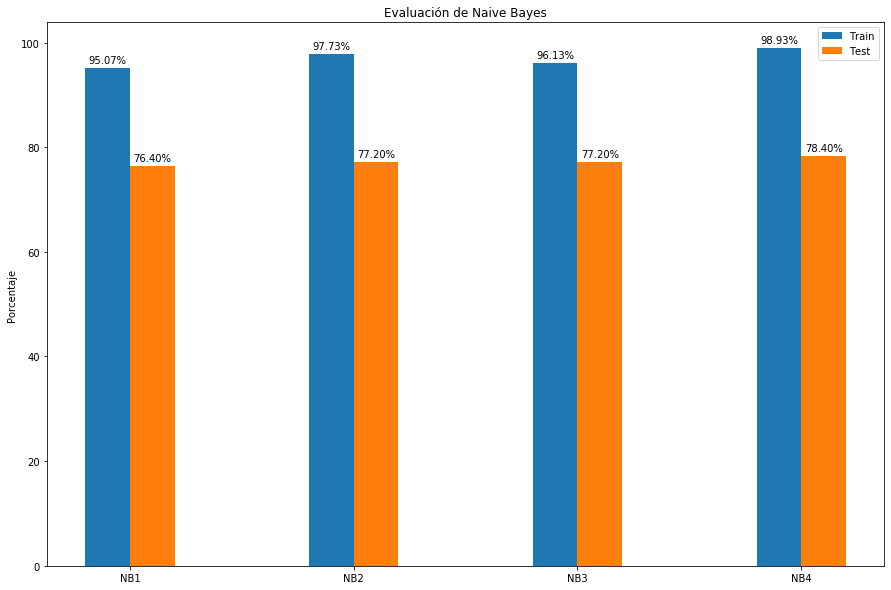

In [190]:
x = np.arange(len(labels))  # the label locations
width = 0.2 # the width of the bars

fig, ax = plt.subplots(figsize = (15, 10))
rects1 = ax.bar(x - width/2, train_means, width, label='Train')
rects2 = ax.bar(x + width/2, test_means, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Porcentaje')
ax.set_title('Evaluación de Naive Bayes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.show()

__¿Hay un clasificador que sea superior al otro? ¿por qué crees que sucede?__

Como podemos apreciar en el gráfico de barras, el mejor clasificador que se tienen en Naive Bayes es el NB4 que  es el código con el que hemos llamado al clasificador con `Bolsa de palabras con TF/IDF con Monogramas y Bigramas` aunque la diferencia para los clasificadores de Naive Bayes es pequeña, pero podemos indicar el orden en el utilizariamos los mismos:

1. NB4: `Bolsa de palabras con TF/IDF con Monogramas y Bigramas`.

2. NB2: `Bolsa de palabras binaria con Monogramas y Bigramas`.

3. NB3: `Bolsa de palabras con TF/IDF con Monogramas`.

4. NB1: `Bolsa de palabras binaria con Monogramas`.

Como hemos indicado anteriormente, el clasificador que utiliza bolsa de palabras con TF/IDF junto a monogramas y bigramas, ya que es la mejor combinación evaluada y esto se debe a que la importancia de una palabra es inversamente relativa a lo común que es en el documento y no se evaluan unicamente las palabras de forma individual si no que también se toma en cuenta la palabra que le precede.

### Árbol de decisión 

Para poder realizar un análisis de los resultados posteriores debemos calcular un Arbol de Decisión sin ninguno de los parametros que estamos ajustando (`binary` y `ngram_range`).

Estos parametros tienen los siguientes valores por defecto:
* `binary`. Por defecto: __False__.

* `ngram_range`. Por defecto: __(1, 1)__.

In [191]:
vectorizer5 = CountVectorizer(stop_words='english')

train_vector_data5 = vectorizer5.fit_transform(train['data'])
test_vector_data5 = vectorizer5.transform(test['data'])

In [192]:
# Creamos el clasificador con los valores por defecto
tree_classifier0 = tree.DecisionTreeClassifier(random_state=42)
tree_classifier0.fit(train_vector_data5, train['type'])

tree_train_predictions0 = tree_classifier0.predict(train_vector_data5)
tree_test_predictions0 = tree_classifier0.predict(test_vector_data5)


print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions0 == train['type']))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions0 == test['type']))

Árbol, porcentaje de aciertos en entrenamiento: 0.9973333333333333
Árbol, porcentaje de aciertos en test: 0.664


- __Bolsa de palabras binaria con Monogramas:__ (Código AD1)

In [193]:
vectorizer6 = CountVectorizer(stop_words='english', binary=True, ngram_range=(1,1))

train_vector_data6 = vectorizer6.fit_transform(train['data'])
test_vector_data6 = vectorizer6.transform(test['data'])

In [194]:
# Creamos el clasificador con los valores por defecto
tree_classifier1 = tree.DecisionTreeClassifier(random_state=42)
tree_classifier1.fit(train_vector_data6, train['type'])

tree_train_predictions1 = tree_classifier1.predict(train_vector_data6)
tree_test_predictions1 = tree_classifier1.predict(test_vector_data6)


print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions1 == train['type']))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions1 == test['type']))

Árbol, porcentaje de aciertos en entrenamiento: 0.9973333333333333
Árbol, porcentaje de aciertos en test: 0.672


In [195]:
labels2 = ['AD1']
train_means2 = [np.mean(tree_train_predictions1 == train['type']) * 100]
test_means2 = [np.mean(tree_test_predictions1 == test['type']) * 100]

__¿Tiene un efecto positivo el añadir “complejidad” a la vectorización? ¿Por qué crees que sucede este
efecto positivo o la falta del mismo?__

|<center>PARTICIÓN</center>|<center>REF</center>|<center>AD1</center>|
|---------|---|---|
|<center>**Train**</center>|<center>0.9973333333333333</center>|<center>0.9973333333333333</center>|
|<center>**Test**</center>|<center>0.664</center>|<center>0.672</center>|

Como podemos observar, añadir los parametros para que funcione con bolsa de palabras binaria (`binary=True`) y con monogramas (`ngram_range=(1,1)`, esto no añade complejidad ya que es igual que el parametro por defecto), produce una leve mejora de los resultados en el conjunto de entrenamiento. Esto sucede ya que el árbol está trabajando con valores indivializados y que creamos un conjunto binartio de palabras para que el tome la decisión.

- __Bolsa de palabras binaria con Monogramas y Bigramas:__ (Código AD2)

In [196]:
vectorizer7 = CountVectorizer(stop_words='english', binary=True, ngram_range=(1,2))

train_vector_data7 = vectorizer7.fit_transform(train['data'])
test_vector_data7 = vectorizer7.transform(test['data'])

In [197]:
# Creamos el clasificador con los valores por defecto
tree_classifier2 = tree.DecisionTreeClassifier(random_state=42)
tree_classifier2.fit(train_vector_data7, train['type'])

tree_train_predictions2 = tree_classifier2.predict(train_vector_data7)
tree_test_predictions2 = tree_classifier2.predict(test_vector_data7)


print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions2 == train['type']))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions2 == test['type']))

Árbol, porcentaje de aciertos en entrenamiento: 0.9973333333333333
Árbol, porcentaje de aciertos en test: 0.672


In [198]:
labels2 = labels2 + ['AD2']
train_means2 = train_means2 + [np.mean(tree_train_predictions2 == train['type']) * 100]
test_means2 = test_means2 + [np.mean(tree_test_predictions2 == test['type']) * 100]

__¿Tiene un efecto positivo el añadir “complejidad” a la vectorización? ¿Por qué crees que sucede este
efecto positivo o la falta del mismo?__

|<center>PARTICIÓN</center>|<center>REF</center>|<center>AD2</center>|
|---------|---|---|
|<center>**Train**</center>|<center>0.9973333333333333</center>|<center>0.9973333333333333</center>|
|<center>**Test**</center>|<center>0.664</center>|<center>0.672</center>|

Como podemos observar, añadir los parametros para que funcione con bolsa de palabras binaria (`binary=True`) y con bigramas (`ngram_range=(1,2)`), produce una leve mejora de los resultados en el conjunto de entrenamiento pero si lo comparamos con el resultado de `AD1` no presenta ninguna mejora. Esto sucede ya que al utilizar un arbol de desicion no representa ninguna mejora el utilizar bigramas ya que extiende las posibilides a evaluar lo cual añade complejidad en cada nodo, por tanto aunque los resultados sean iguales a la anterior, es preferible no utilizar este modelo de la solución ya que añade complejidad innecesaria. 

- __Bolsa de palabras con TF/IDF con Monogramas:__ (Código AD3)

In [199]:
vectorizer8 = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,1))

train_vector_data8=vectorizer8.fit_transform(train['data'])

tfidfer8= TfidfTransformer()

# Calculamos el valor TF-IDF 
train_preprocessed8=tfidfer8.fit_transform(train_vector_data8)

# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
test_vector_data8=vectorizer8.transform(test['data'])
# Calculamos el valor TF-IDF 
# Al usar "transform" toma como IDF el del conjunto de entrenamiento 
test_preprocessed8=tfidfer8.transform(test_vector_data8)

In [200]:
# Creamos el clasificador con los valores por defecto
tree_classifier3 = tree.DecisionTreeClassifier(random_state=42)
tree_classifier3.fit(train_preprocessed8, train['type'])

tree_train_predictions3 = tree_classifier3.predict(train_preprocessed8)
tree_test_predictions3 = tree_classifier3.predict(test_preprocessed8)


print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions3 == train['type']))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions3 == test['type']))

Árbol, porcentaje de aciertos en entrenamiento: 0.9973333333333333
Árbol, porcentaje de aciertos en test: 0.696


In [201]:
labels2 = labels2 + ['AD3']
train_means2 = train_means2 + [np.mean(tree_train_predictions3 == train['type']) * 100]
test_means2 = test_means2 + [np.mean(tree_test_predictions3 == test['type']) * 100]

__¿Tiene un efecto positivo el añadir “complejidad” a la vectorización? ¿Por qué crees que sucede este
efecto positivo o la falta del mismo?__

|<center>PARTICIÓN</center>|<center>REF</center>|<center>AD3</center>|
|---------|---|---|
|<center>**Train**</center>|<center>0.9973333333333333</center>|<center>0.9973333333333333</center>|
|<center>**Test**</center>|<center>0.664</center>|<center>0.696</center>|

Como podemos observar, añadir los parametros para que funcione con bolsa de palabras TF/IDF (`binary=False`) y con monogramas (`ngram_range=(1,1)`), produce una leve mejora de los resultados en el conjunto de entrenamiento, que es incluso mejor que la mejora de los árbolas de decisión `AD1` y `AD2`. Este resultado se debe a que al poner el peso en las palabras segun se encuentren con el tipo de bolsa de palabras TI/IDF tambien se esta analizando cada palabra por separado con lo cual el arbol realiza un mejor análisis.

- __Bolsa de palabras con TF/IDF con Monogramas y Bigramas:__ (Código AD4)

In [202]:
vectorizer9 = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,2))

train_vector_data9 = vectorizer9.fit_transform(train['data'])

tfidfer9 = TfidfTransformer()

# Calculamos el valor TF-IDF 
train_preprocessed9 = tfidfer9.fit_transform(train_vector_data9)

# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
test_vector_data9 = vectorizer9.transform(test['data'])
# Calculamos el valor TF-IDF 
# Al usar "transform" toma como IDF el del conjunto de entrenamiento 
test_preprocessed9 = tfidfer9.transform(test_vector_data4)

In [203]:
# Creamos el clasificador con los valores por defecto
tree_classifier4 = tree.DecisionTreeClassifier(random_state=42)
tree_classifier4.fit(train_preprocessed9, train['type'])

tree_train_predictions4 = tree_classifier4.predict(train_preprocessed9)
tree_test_predictions4 = tree_classifier4.predict(test_preprocessed9)


print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions4 == train['type']))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions4 == test['type']))

Árbol, porcentaje de aciertos en entrenamiento: 0.9973333333333333
Árbol, porcentaje de aciertos en test: 0.664


In [204]:
labels2 = labels2 + ['AD4']
train_means2 = train_means2 + [np.mean(tree_train_predictions4 == train['type']) * 100]
test_means2 = test_means2 + [np.mean(tree_test_predictions4 == test['type']) * 100]

__¿Tiene un efecto positivo el añadir “complejidad” a la vectorización? ¿Por qué crees que sucede este
efecto positivo o la falta del mismo?__

|<center>PARTICIÓN</center>|<center>REF</center>|<center>AD4</center>|
|---------|---|---|
|<center>**Train**</center>|<center>0.9973333333333333</center>|<center>0.9973333333333333</center>|
|<center>**Test**</center>|<center>0.664</center>|<center>0.664</center>|

Como podemos observar, añadir los parametros para que funcione con bolsa de palabras TF/IDF (`binary=False`) y con bigramas (`ngram_range=(1,2)`), no produce ninguna mejora de los resultados. Esto puede ocurrir debido a que el arbol de decisión trabaja con preguntas concretas que puedan ser individualizadas y al utilizar bigramas no ayuda a producir mejoras.

### Comparativa entre los clasificadores

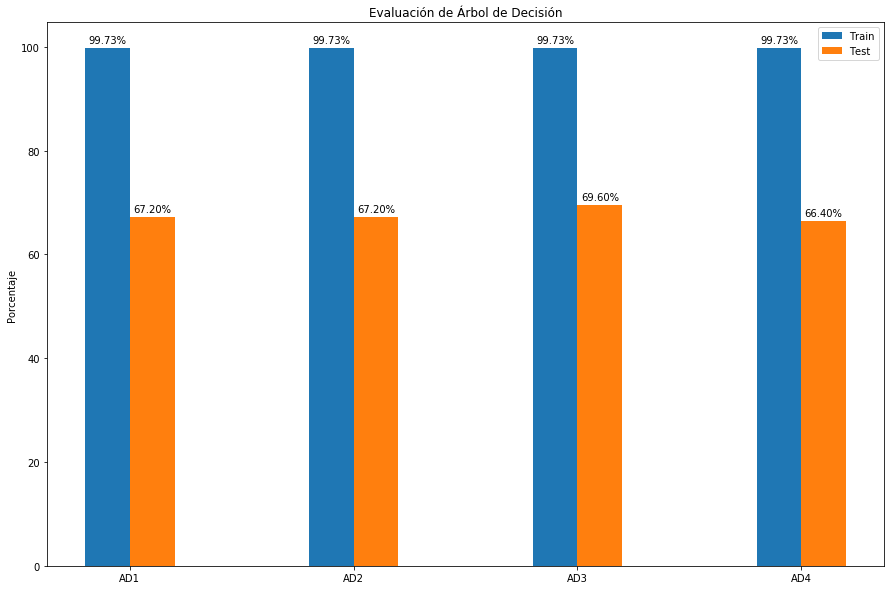

In [205]:
x = np.arange(len(labels2))  # the label locations
width = 0.2 # the width of the bars

fig, ax = plt.subplots(figsize = (15, 10))
rects1 = ax.bar(x - width/2, train_means2, width, label='Train')
rects2 = ax.bar(x + width/2, test_means2, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Porcentaje')
ax.set_title('Evaluación de Árbol de Decisión')
ax.set_xticks(x)
ax.set_xticklabels(labels2)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.show()

__¿Hay un clasificador que sea superior al otro? ¿por qué crees que sucede?__

Como podemos apreciar en el gráfico de barras, el mejor clasificador que se generó con `Árboles de Decisión` es el AD3 que  es el código con el que hemos llamado al clasificador con `Bolsa de palabras con TF/IDF con Monogramas` aunque la diferencia para los clasificadores de Árboles de Decisión es pequeña, pero podemos indicar el orden en el utilizariamos los mismos:

1. AD3: `Bolsa de palabras con TF/IDF con Monogramas`.

2. AD1: `Bolsa de palabras binaria con Monogramas`.

3. AD2: `Bolsa de palabras binaria con Monogramas y Bigramas`.

4. AD4: `Bolsa de palabras con TF/IDF con Monogramas y Bigramas`.

Tal y como hemos indicado anteriormente, la mejor solución con arboles de decisión es la que utiliza `Bolsa de palabras con TF/IDF con Monogramas` esto se debe a que aplica mejores conclusiones sobre datos individualizados y así el arbol puede tomar algunas decisiones mas certeras.

### Palabras predominantes en el Árbol de Decisión con bolsa de palabras con TF/IDF y Monogramas

El clasificador a utilizar es el `tree_classifier3`.

In [206]:
def print_topN_features_in_trees(vectorizer, clf, n=20):
    """Prints features with the highest coefficient values"""
    feature_names = vectorizer.get_feature_names()
    
    topN = np.argsort(clf.feature_importances_)[-n:]
    reversed_top = topN[::-1]
    print("Top {} features in the tree\n".format(n))
    print("%s" % ( " ".join(feature_names[j] for j in reversed_top)))

print_topN_features_in_trees(vectorizer,tree_classifier3,15)

Top 15 features in the tree

great good delicious best place nice amazing love friendly awesome excellent fantastic time perfect vegas


__¿Predominan más las palabras de uno u otro sentimiento? ¿por qué? ¿hay ruido?__

Hemos observado que predominan las palabras con sentimiento positivo, esto se debe a que el clasificador ha sobreaprendido reglas y busca pequeñas diferencias para decicir el sentimiento presente en el texto.

Por otra parte, podemos observar que en el existe ruido con palabras como **place**, **time** y **vegas**.

### Palabras predominantes en Naive Bayes con bolsa de palabras con TF/IDF con Monogramas y Bigramas.

El clasificador a utilizar es el `mnb_classifier4`.

In [207]:
def print_topN_features_per_class_in_NB(vectorizer, clf, class_labels, n=20):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    print("Top {} features per class\n".format(n))
    for i, class_label in enumerate(class_labels):
        topN = np.argsort(clf.feature_log_prob_[i])[-n:]
        reversed_top = topN[::-1]
        
        print("%s:   %s" % (class_label,
              " ".join(feature_names[j] for j in reversed_top)),'\n')

class_labels = ["bad","good"]
print_topN_features_per_class_in_NB(vectorizer4,mnb_classifier4,class_labels, 15)  

Top 15 features per class

bad:   food place service don won like bad time good think probably did eating minutes going 

good:   great good place food service delicious awesome amazing love friendly best nice really time just 



__¿Tienen sentido las palabras seleccionadas? ¿hay ruido (palabras sin sentimiento o de sentimiento opuesto al esperado)? ¿por qué crees que suceden estos fenómenos?__

Como podemos observar en las listas anteriores, hay palabras que no tienen sentido como por ejemplo **food** que se encuentra en ambas listas.

Además, si miramos el contenido de cada lista, podemos decir que:

- Para las palabras que clasifican un texto como malo, solo encontramos dos palabras que pueden indicar que realmente es malo: **bad** y **probably**.

- Sin embargo, para las palabras que clasifican un texto como bueno, la mayoria de las palabras indican que buenos sentimientos, aunque se tienen algunas que son ruido como **place**, **food**, **service**, **really**, **time** y **just**.

Esto puede suceder porque el clasificador este sobreaprendiendo y busque pequeñas diferencias para clasificar los textos.

# Apartado B.

Gracias a las observaciones y deducciones realizadas anteriormente podemos darnos cuenta que el mejor clasificador Naive Bayes es el **NB4 (Bolsa de palabras con TF/IDF con Monogramas y Bigramas)** y el mejor arbol de decisión es el **AD3 (Bolsa de palabras con TF/IDF con Monogramas).**

## Análisis de la precisión y exhaustividad de los mejores clasificadores
###  Naive Bayes

In [208]:
mnb_classifier = mnb_classifier4
mnb_predictions = mnb_test_predictions4

print(classification_report(test['type'], mnb_predictions, target_names=["bad", "good"]))

              precision    recall  f1-score   support

         bad       0.84      0.72      0.77       128
        good       0.74      0.85      0.79       122

    accuracy                           0.78       250
   macro avg       0.79      0.79      0.78       250
weighted avg       0.79      0.78      0.78       250



Vemos que gracias al valor de exhaustividad que predice correctamente un 85% de las ocasiones las frases positivas, estando su mayor debilidad en la predicción de frases negativas en un 72%, dando problemas de falsos positivos, ya que predice frases que son negativas como positivas en un 28% de los casos.

En nuestro caso al disminuir la exhaustividad aumenta el valor de precisión por lo que las muestras predichas como negativas tienen una probabilidad del 84% de ser más fieles a la propia realidad de la frase (falsedad o negatividad de la misma), con lo que respecta a las positivas tienen una probabilidad menor, del 74%.

Con el análisis de estos dos clasificadores podemos ver que no tienen un comportamiento homogéneo a la hora de clasificar ambas clases (negativa y positiva). Por lo que cada clase presenta sus fortalezas y debilidades expresadas anteriormente.

### Árbol de decisión

In [209]:
tree_classifier = tree_classifier3
tree_predictions = tree_test_predictions3

print(classification_report(test['type'], tree_predictions, target_names=["bad", "good"]))

              precision    recall  f1-score   support

         bad       0.69      0.75      0.72       128
        good       0.71      0.64      0.67       122

    accuracy                           0.70       250
   macro avg       0.70      0.69      0.69       250
weighted avg       0.70      0.70      0.69       250



Tras la observación de los valores obtenidos, en concreto la exhaustividad, nos damos cuenta de que su mayor debilidad en la predicción de frases positivas, es tender a los falsos negativos con una probabilidad del 36%. También su mayor fortaleza es que es capaz de predecir con un 75% de las ocasiones las muestras negativas, aunque no habría que subestimar el 25% de probabilidad de falsos positivos.

Los valores de precisión no difieren en gran medida a pesar de clara diferencia de la métrica de exhaustividad en ambas clases, por lo que se confirma que su mayor capacidad reside en las predicciones de frases negativas.

Con el análisis de estos dos clasificadores podemos ver que no tienen un comportamiento homogéneo a la hora de clasificar ambas clases (negativa y positiva). Por lo que cada clase presenta sus fortalezas y debilidades expresadas anteriormente.

**¿Hay algún clasificador que sea mejor que el otro en todo?**

Después de haber analizado completamente ambos clasificadores nos damos cuenta de que el más capacitado para predecir las clases correctamente es el Naive Bayes (NB4) que utiliza bolsa de palabras con TF/IDF con Monogramas y Bigramas. Su tasa de fallo general ante las predicciones es menor con respecto al árbol de decisión, nos damos cuenta de esto gracias a los valores de precisión y exhaustividad obtenidos.

**¿Coinciden ambos clasificadores a la hora de clasificar mejor una clase que la otra?**

No coinciden, de hecho, son contrarios. El clasificador Naive Bayes precide las frases positivas con mayor exactitud, en cambio en el árbol de decisión son las frases negativas las más faciles de predecir.

## Análisis árbol de decisión

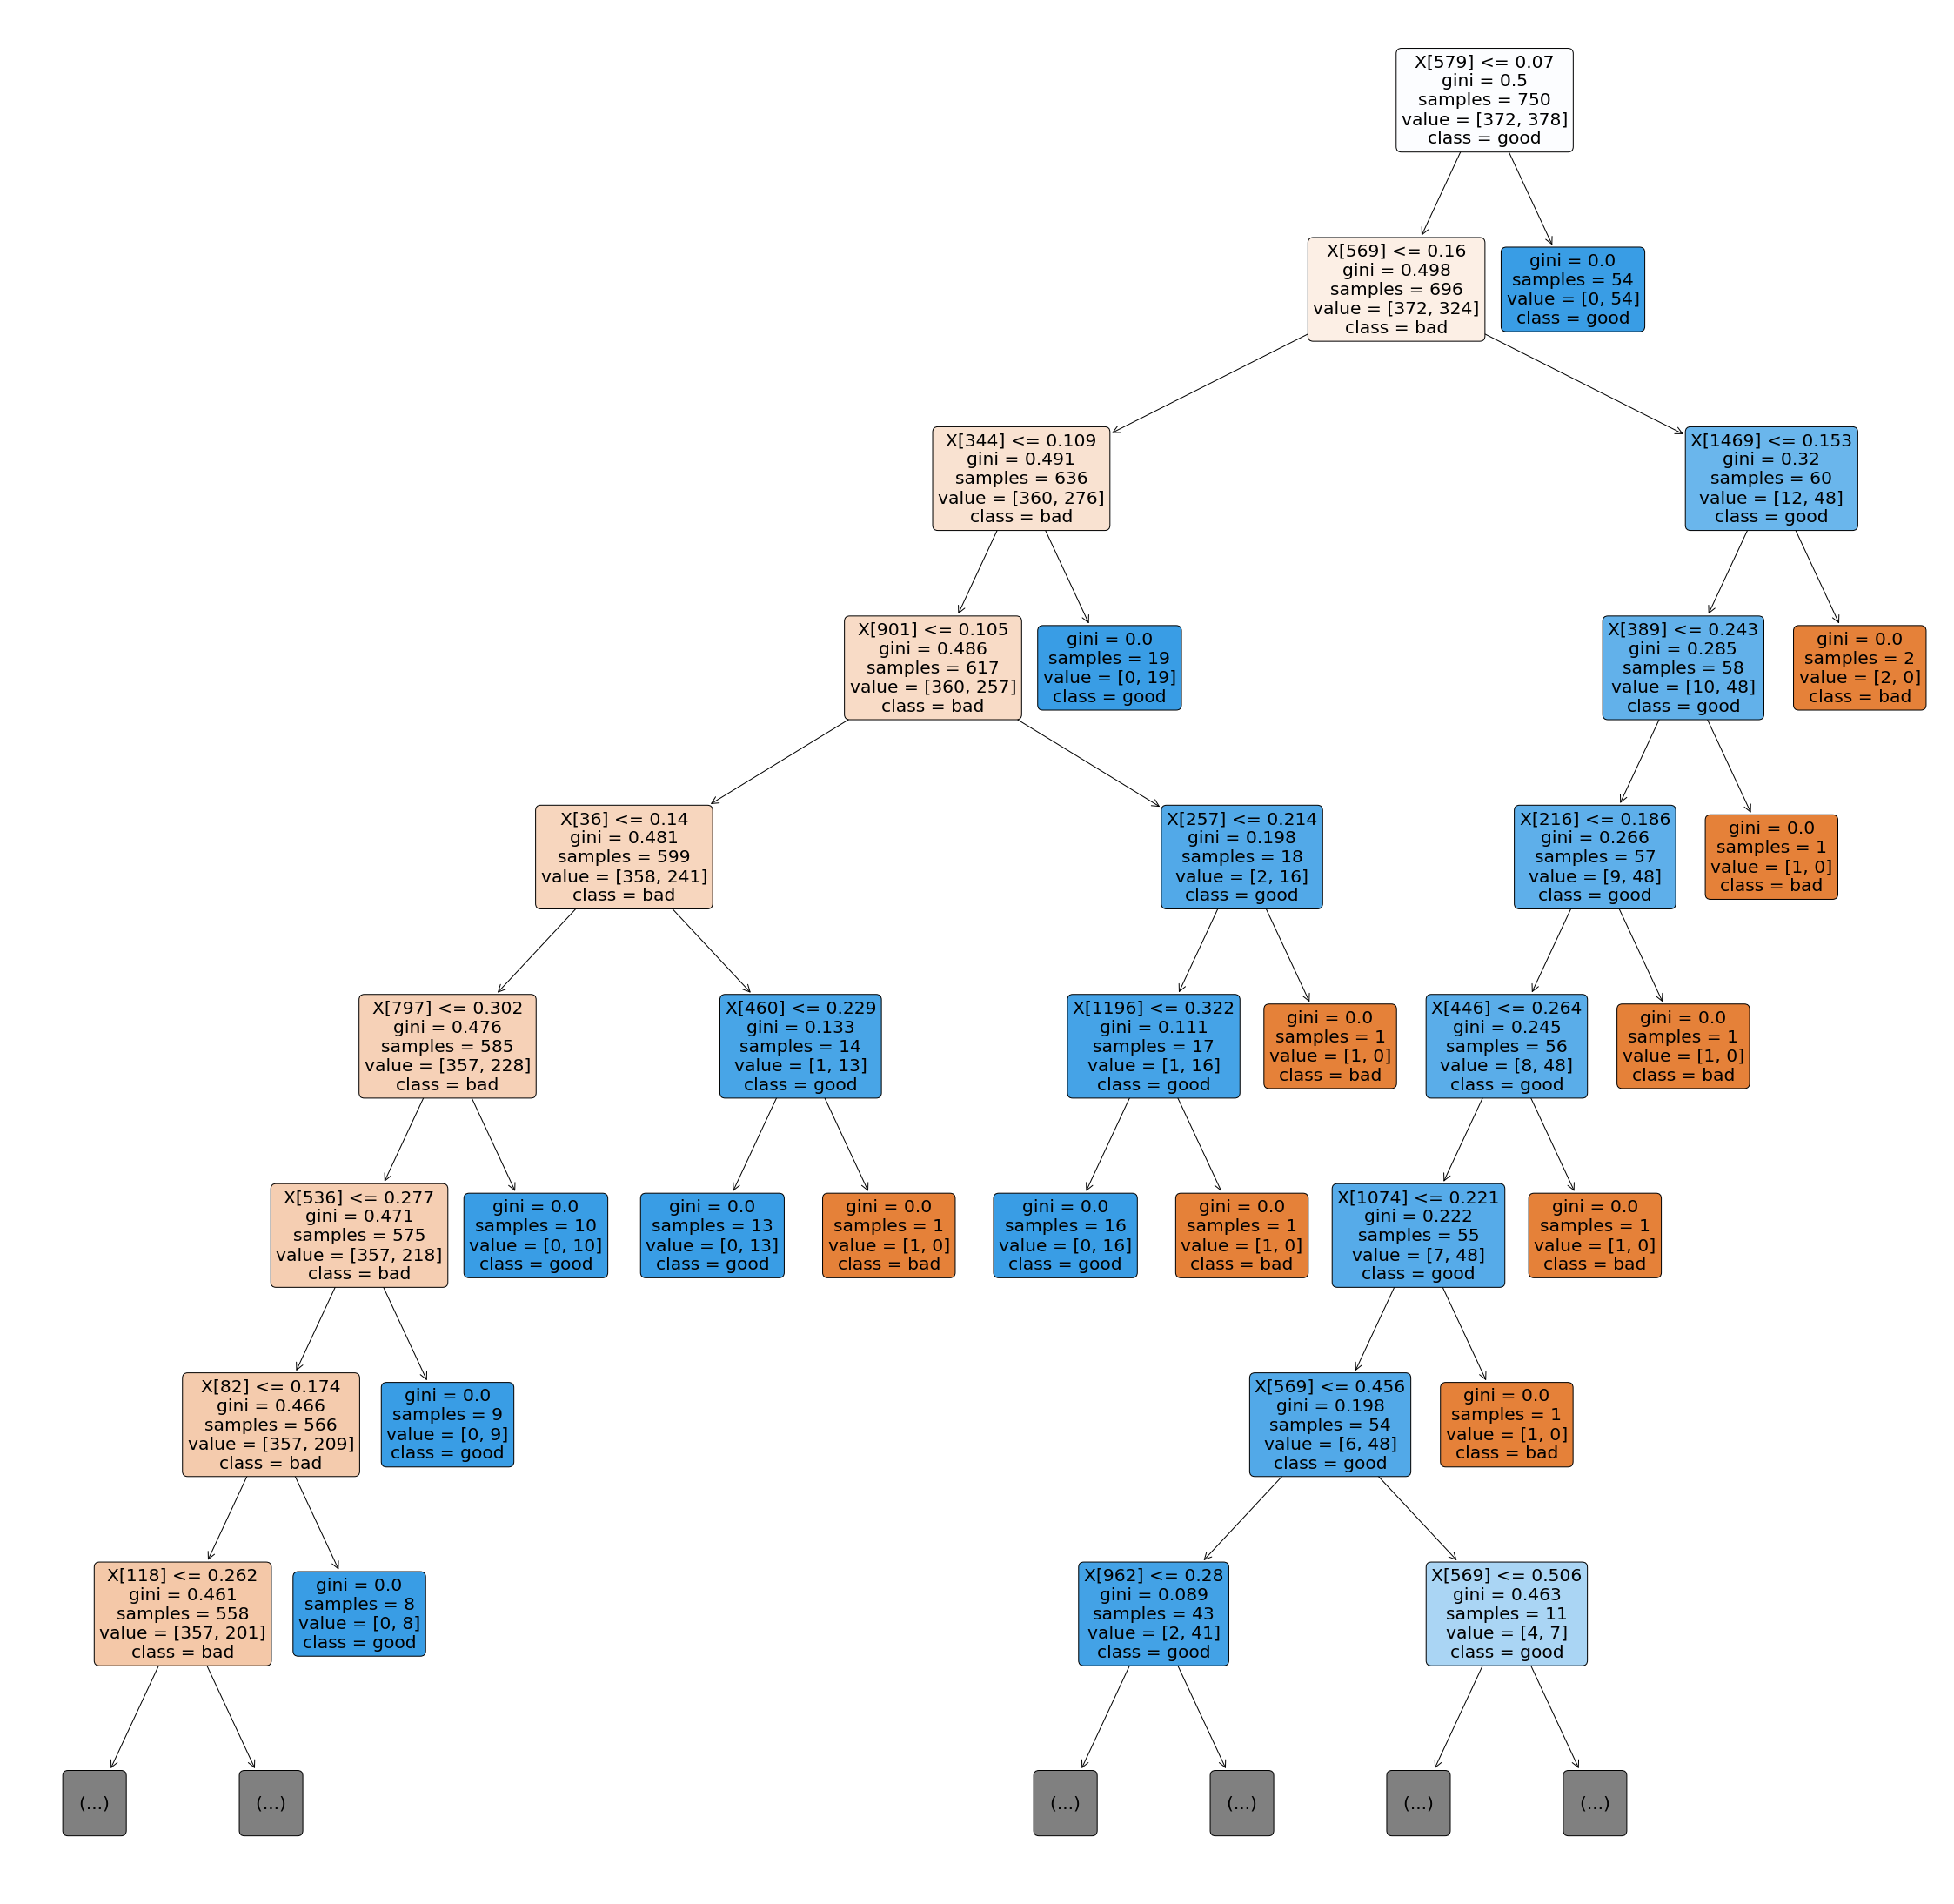

In [210]:
# Vamos a mostrar el árbol de decisión generado usando plot_tree
plt.figure(figsize=(40,40))
plot_tree(tree_classifier, filled=True, class_names=["bad", "good"], rounded=True, max_depth=8)
plt.show()

**¿Qué estructura tiene el árbol?**

Es un árbol escorado hacia sus hijos izquierdos, donde nada más comenzar se realiza un división descompensada entre los ejemplos creando nodos negativos y positivos, 636 ejemplos y 60 ejemplos, respectivamente.

**¿Cómo interpretas los niveles que has pintado? ¿tienen algún sentido con respecto a la tasa de aciertos, o la precisión y exhaustividad del clasificador?**

Podemos observar que se relaciona directamente con los valores obtenidos en el apartado anterior. El valor de precisión más alto corresponde a las frases positivas y esto se ve claramente en los nodos hoja del árbol donde en la mayoría de los casos existen más ejemplos de frases positivas, en relación con los 1 o 2 ejemplos negativos. También se puede ver como la exhaustividad de las predicciones negativas es mayor al existir nodos principalmente negativos con un mayor número de ejemplos respecto a los positivos.

**¿Hay nodos impuros?**

Obviamente existen nodos impuros al comienzo del árbol y se van convirtiendo en más exactos con el desarrollo del mismo. A pesar de esto habría que tener cuidado con el hecho de sobre aprender de los datos, ya que existen muchos nodos hoja que cuentan con muy pocos casos de ejemplo. 
Además existen algunos nodos (si solo mostramos los 8 primeros niveles) como el último situado más a la derecha con una proporción [4 Negativa, 7 Positiva] siendo este un claro ejemplo de nodo impuro. 

## Clasificador Naive Bayes

In [211]:
test['type'].values

array(['good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'bad', 'good', 'bad', 'bad',
       'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'good', 'bad', 'bad',
       'bad', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'bad',
       'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good'

In [212]:
mnb_predictions

array(['bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'bad',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'bad',
       'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'bad',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad',
 

**Críticas que han sido falsas positivas (malas críticas calificadas como buenas)**

In [213]:
pd.options.display.max_colwidth = 100 # Para poder ver completamente toda la oración de ejemplo

n = 0
j = -1
for i in test['type'].values:
    j = j + 1
    if(n < 2 and (i == 'bad' and mnb_predictions[j] == 'good')):
        n = n + 1
        print(test.iloc[j])

data    Tried to go here for lunch and it was a madhouse.
type                                                  bad
Name: 636, dtype: object
data    The place was not clean and the food oh so stale!
type                                                  bad
Name: 761, dtype: object


**¿Por qué crees que ha fallado el clasificador en cada uno de los casos?**

Tal y como hemos expuesto anteriormente con el análisis de la exhaustividad y precisión, una de las mayores debilidades es clasificar la clase "bad", además revisando el segundo ejemplo podemos pensar que se ha aprendido de manera errónea que la palabra "clean" siempre esta asociada a una crítica buena.
En el primer ejemplo podemos ver el fragmento "go here for lunch" que nuestro clasificador ha aprendido que cualquier oración que lo contenga se considera mala, sin realmente tener en cuenta el final de la misma.


**Críticas que han sido falsas negativas (buenas críticas clasificadas como malas)**

In [214]:
n = 0
j = -1
for i in test['type'].values:
    j = j + 1
    if(n < 2 and (i == 'good' and mnb_predictions[j] == 'bad')):
        n = n + 1
        print(test.iloc[j])

data    If you haven't gone here GO NOW!
type                                good
Name: 521, dtype: object
data    I went to Bachi Burger on a friend's recommendation and was not disappointed.
type                                                                             good
Name: 280, dtype: object


**¿Por qué crees que ha fallado el clasificador en cada uno de los casos?**

En el primer ejemplo pienso que al aparecer un verbo en negativo "haven't" se ha asociado directamente como opinión "bad" ya que en la mayoría de opiniones malas aparece esta forma verbal. También en el segundo ejemplo ha ocurrido algo parecido con el verbo "was not" que además en este caso viene acompañado del adjetivo "disappointed" que suscita al clasificador a determinarlo como una opinión negativa.


**¿Se te ocurre alguna idea sobre cómo mejorar el clasificador de sentimiento?**

Podríamos aumentar la casuística de ejemplos para que sea más variada y no sobre aprenda de nuestro conjunto de ejemplos. Aún así creo que es bastante complicado ya que se pueden utilizar expresiones negativas para crear una opinión positiva y también lo contrario, dificultando así la tarea de aprendizaje de nuestro clasificador.


## Clasificador árbol de decisión

In [215]:
test['type'].values

array(['good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'bad', 'good', 'bad', 'bad',
       'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'good', 'bad', 'bad',
       'bad', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'bad',
       'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good'

In [216]:
tree_predictions

array(['bad', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad',
       'bad', 'good', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'bad',
       'good', 'good', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'bad',
       'bad', 'good', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'bad',
       'bad', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'bad', 'ba

**Críticas que han sido falsas positivas (malas críticas calificadas como buenas)**

In [217]:
n = 0
j = -1
for i in test['type'].values:
    j = j + 1
    if(n < 2 and (i == 'bad' and tree_predictions[j] == 'good')):
        n = n + 1
        print(test.iloc[j])

data    Best of luck to the rude and non-customer service focused new management.
type                                                                          bad
Name: 626, dtype: object
data    Tried to go here for lunch and it was a madhouse.
type                                                  bad
Name: 636, dtype: object


**¿Por qué crees que ha fallado el clasificador en cada uno de los casos?**

En la segunda oración ocurre lo mismo que en el ejemplo del clasificador anterior, donde el fragmento "go here for lunch" señala que es una opinión positiva sin esta serlo en su totalidad. En el primer ejemplo creo que ocurre algo parecido con "best of luck" o quizás también con "service focused".

**Críticas que han sido falsas negativas (buenas críticas clasificadas como malas)**

In [218]:
n = 0
j = -1
for i in test['type'].values:
    j = j + 1
    if(n < 2 and (i == 'good' and tree_predictions[j] == 'bad')):
        n = n + 1
        print(test.iloc[j])

data    If you haven't gone here GO NOW!
type                                good
Name: 521, dtype: object
data    Reasonably priced also!
type                       good
Name: 513, dtype: object


**¿Por qué crees que ha fallado el clasificador en cada uno de los casos?**

Como pudimos observar este clasificador tiene una mayor dificultad con las opiniones malas, en el primer ejemplo ocurre lo mismo que con el clasificador anterior que se confunde la negatividad sintáctica de la oración con la propia opinión positiva.
Creo que en el segundo ejemplo lo que ha ocurrido es que se asocia la palabra "priced" con una opinión negativa, ya que en la mayoría de los casos de entrenamiento ocurre esto.

**¿Se te ocurre alguna idea sobre cómo mejorar el clasificador de sentimiento?**

Como he expresado en el anterior clasificador sería buena idea aumentar la cantidad de opiniones y tener un espectro más diversificado sin aumentar demasiado el tamaño del vector de palabras, puesto que así tendríamos más ejemplos de una misma palabra y reduciríamos en cierta medida el concepto de asociar directamente un grupo de palabras con una determinada opinión (Que es lo que ocurre en la mayoría de predicciones erróneas).